<a href="https://colab.research.google.com/github/m-zohaib-khan/C-language/blob/main/Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from collections import deque

# Graph representation (adjacency list)
# Modify this according to your actual graph edges
graph = {
    0: [1, 2],
    1: [0, 2],
    2: [0, 1, 3],
    3: [3]
}

# BFS Implementation
def bfs(start_node):
    visited = set()
    queue = deque()

    visited.add(start_node)
    queue.append(start_node)

    print("BFS Traversal:")
    while queue:
        current_node = queue.popleft()
        print(current_node, end=" ")

        for neighbor in graph[current_node]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)
    print("\n")

# DFS Implementation (recursive)
def dfs_recursive(node, visited):
    visited.add(node)
    print(node, end=" ")

    for neighbor in graph[node]:
        if neighbor not in visited:
            dfs_recursive(neighbor, visited)

# DFS Implementation (iterative)
def dfs_iterative(start_node):
    visited = set()
    stack = []

    stack.append(start_node)

    print("DFS Traversal (Iterative):")
    while stack:
        current_node = stack.pop()
        if current_node not in visited:
            print(current_node, end=" ")
            visited.add(current_node)
            # Push neighbors in reverse order to match recursive DFS
            for neighbor in reversed(graph[current_node]):
                if neighbor not in visited:
                    stack.append(neighbor)
    print("\n")

# Main execution
if __name__ == "__main__":
    print("Graph Adjacency List:", graph)

    # Run BFS from node 0
    bfs(0)

    # Run DFS (recursive) from node 0
    print("DFS Traversal (Recursive):")
    dfs_recursive(0, set())
    print("\n")

    # Run DFS (iterative) from node 0
    dfs_iterative(0)

Graph Adjacency List: {0: [1, 2], 1: [0, 2], 2: [0, 1, 3], 3: [3]}
BFS Traversal:
0 1 2 3 

DFS Traversal (Recursive):
0 1 2 3 

DFS Traversal (Iterative):
0 1 2 3 



Generating random datasets...
Building trees for each dataset...
Performing searches and measuring time...

Results DataFrame:


,Tree Size,BFS Time,DFS Time
0,1000,0.000043,0.000320
1,40000,0.014442,0.002643
2,80000,0.095091,0.006503
3,200000,0.524989,0.001503
4,1000000,10.064792,0.207662


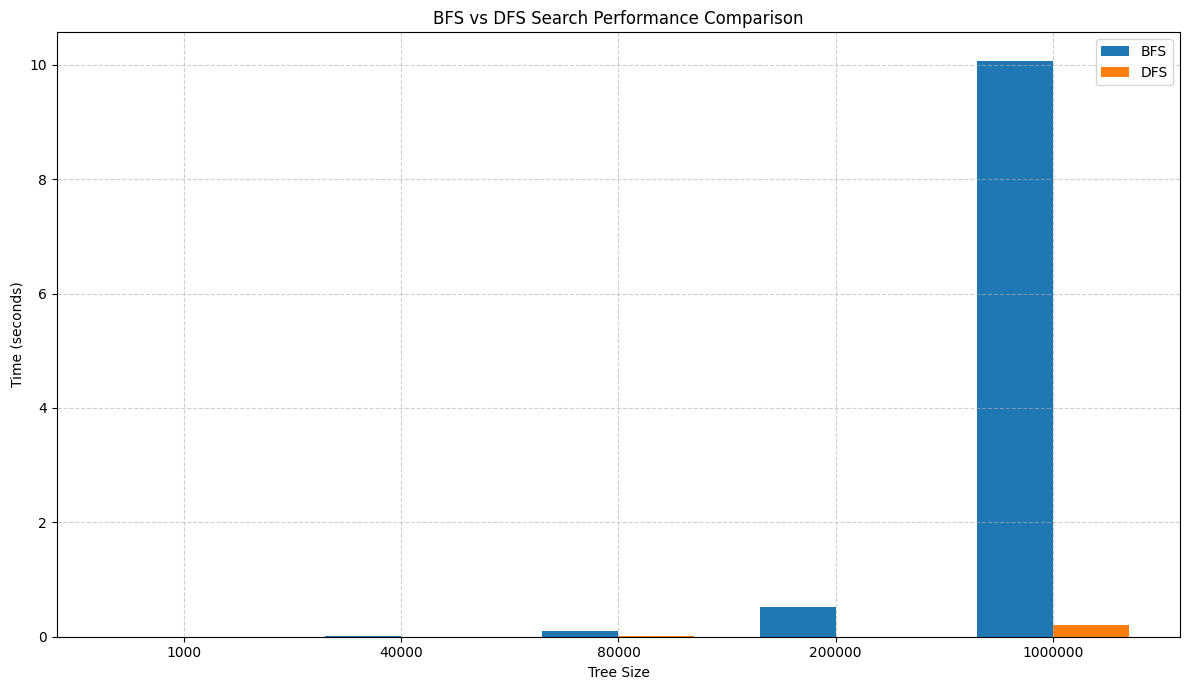

In [3]:
import random
import time
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# Step 1: Generate random unique datasets
print("Generating random datasets...")
sizes = [1000, 40000, 80000, 200000, 1000000]
datasets = {}

for size in sizes:
    datasets[size] = random.sample(range(size * 2), size)
    assert len(datasets[size]) == len(set(datasets[size])), "Numbers are not unique"

# Step 2: BST implementation
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

def insert(root, value):
    if root is None:
        return TreeNode(value)
    if value < root.value:
        root.left = insert(root.left, value)
    else:
        root.right = insert(root.right, value)
    return root

def build_tree(data):
    root = None
    for value in data:
        root = insert(root, value)
    return root

print("Building trees for each dataset...")
trees = {}
for size, data in datasets.items():
    trees[size] = build_tree(data)

# Step 3: Search implementations
def bfs(root, goal):
    if root is None:
        return None

    queue = [root]
    while queue:
        current = queue.pop(0)
        if current.value == goal:
            return current
        if current.left:
            queue.append(current.left)
        if current.right:
            queue.append(current.right)
    return None

def dfs(root, goal):
    if root is None:
        return None
    if root.value == goal:
        return root

    left_result = dfs(root.left, goal)
    if left_result is not None:
        return left_result

    return dfs(root.right, goal)

# Step 4: Perform searches and measure time
print("Performing searches and measuring time...")
results = []

for size, tree in trees.items():
    data = datasets[size]
    goal = data[len(data) - 220]  # Goal is list[total_len - 220]

    # BFS
    start_time = time.time()
    bfs_result = bfs(tree, goal)
    bfs_time = time.time() - start_time

    # DFS
    start_time = time.time()
    dfs_result = dfs(tree, goal)
    dfs_time = time.time() - start_time

    assert bfs_result.value == dfs_result.value, "BFS and DFS found different results"

    results.append({
        'Tree Size': size,
        'BFS Time': bfs_time,
        'DFS Time': dfs_time
    })

# Step 5: Create DataFrame and visualize
df = pd.DataFrame(results)
print("\nResults DataFrame:")
display(df)

# Plotting
plt.figure(figsize=(12, 7))
x = range(len(df))
width = 0.35

plt.bar(x, df['BFS Time'], width, label='BFS')
plt.bar([p + width for p in x], df['DFS Time'], width, label='DFS')

plt.xlabel('Tree Size')
plt.ylabel('Time (seconds)')
plt.title('BFS vs DFS Search Performance Comparison')
plt.xticks([p + width/2 for p in x], df['Tree Size'])
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

=== Shortest Path Finder ===
Finding shortest route from Islamabad to Karachi

Shortest path found:
Islamabad → Rawalpindi → Quetta → Karachi

Total cities to travel through: 3

Generating visualization...


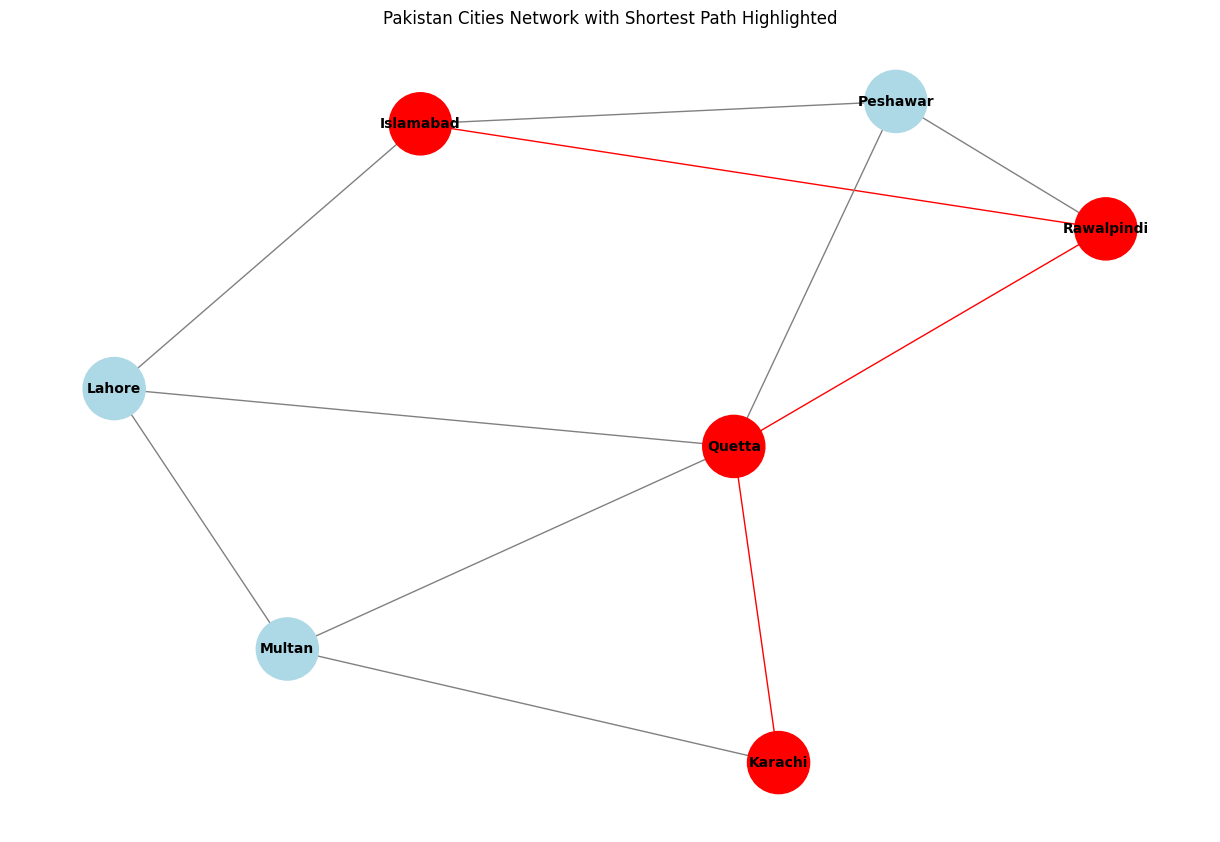

In [4]:
from collections import deque
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Define the city connections
city_graph = {
    'Islamabad': ['Rawalpindi', 'Lahore', 'Peshawar'],
    'Rawalpindi': ['Islamabad', 'Peshawar', 'Quetta'],
    'Peshawar': ['Islamabad', 'Rawalpindi', 'Quetta'],
    'Lahore': ['Islamabad', 'Multan', 'Quetta'],
    'Multan': ['Lahore', 'Karachi', 'Quetta'],
    'Quetta': ['Rawalpindi', 'Peshawar', 'Multan', 'Karachi'],
    'Karachi': ['Multan', 'Quetta']
}

# Step 2: BFS implementation for shortest path
def bfs_shortest_path(graph, start, goal):
    queue = deque()
    queue.append((start, [start]))
    visited = set()
    visited.add(start)

    while queue:
        current_city, path = queue.popleft()

        if current_city == goal:
            return path

        for neighbor in graph[current_city]:
            if neighbor not in visited:
                visited.add(neighbor)
                new_path = list(path)
                new_path.append(neighbor)
                queue.append((neighbor, new_path))

    return None

# Step 3: Find and display the shortest path
start_city = 'Islamabad'
destination = 'Karachi'
shortest_path = bfs_shortest_path(city_graph, start_city, destination)

print("=== Shortest Path Finder ===")
print(f"Finding shortest route from {start_city} to {destination}\n")

if shortest_path:
    print("Shortest path found:")
    print(" → ".join(shortest_path))
    print(f"\nTotal cities to travel through: {len(shortest_path)-1}")
else:
    print(f"No path exists from {start_city} to {destination}")

# Step 4: Visualize the path
if shortest_path:
    print("\nGenerating visualization...")
    G = nx.Graph()

    # Add all nodes and edges
    for city in city_graph:
        for neighbor in city_graph[city]:
            G.add_edge(city, neighbor)

    # Set node and edge colors for the path
    node_colors = ['red' if node in shortest_path else 'lightblue' for node in G.nodes()]
    edge_colors = []
    for u, v in G.edges():
        if u in shortest_path and v in shortest_path and abs(shortest_path.index(u) - shortest_path.index(v)) == 1:
            edge_colors.append('red')
        else:
            edge_colors.append('gray')

    # Draw the graph
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color=node_colors,
            edge_color=edge_colors, node_size=2000,
            font_size=10, font_weight='bold')
    plt.title("Pakistan Cities Network with Shortest Path Highlighted")
    plt.show()